In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import csv
import datetime
from dateutil.parser import parse
from pandas.tools.plotting import scatter_matrix
from patsy import dmatrices
import statsmodels.formula.api as smf
from sklearn import cross_validation
from sklearn import datasets
from sklearn import svm
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
from numpy.random import randn
from scipy import stats
from pprint import pprint as pp
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
import urllib2

%matplotlib inline

sns.set_palette("deep", desat=.8)
sns.set_context(rc={"figure.figsize": (14, 8)})

In [42]:
# Chalenge 1

congressrl = "https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data"

def get_data(url):
    newrl = urllib2.urlopen(url)
    return pd.read_csv(newrl, header=-1)

def challenge_one():
    df            = get_data(congressrl)
    df            = df.replace(['y'], [1])
    df            = df.replace(['n'], [0])
    df = df.replace("?", np.nan)

    for num in list(xrange(1,17)):
        df[num] = df[num].replace(np.nan, df[num].mean())

    return df


df = challenge_one()

In [43]:
model                   = LogisticRegression()
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
train, test     = train_test_split(df, train_size = 0.8)


In [44]:
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]

In [45]:
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
print "Accuracy is:"
a_score

Accuracy is:


0.97701149425287359

In [46]:
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Precision is:"
stuff[0][0]

Precision is:


0.98245614035087714

In [47]:
print "Recall is:"
stuff[1][0]

Recall is:


0.98245614035087714

In [48]:
print "F1 is:"
stuff[2][0]

F1 is:


0.98245614035087714

In [49]:
model = KNeighborsClassifier(n_neighbors=16)
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
print "Accuracy is:"
a_score

Accuracy is:


0.95402298850574707

In [50]:
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Precision is:"
stuff[0][0]

Precision is:


0.98181818181818181

In [51]:
print "Recall is:"
stuff[1][0]

Recall is:


0.94736842105263153

In [52]:
print "F1 is:"
stuff[2][0]

F1 is:


0.96428571428571419

In [53]:
model   = LogisticRegression()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
print "Accuracy is:"
a_score

Accuracy is:


0.97701149425287359

In [54]:
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Precision is:"
stuff[0][0]

Precision is:


0.98245614035087714

In [55]:
print "Recall is:"
stuff[1][0]

Recall is:


0.98245614035087714

In [56]:
print "F1 is:"
stuff[2][0]

F1 is:


0.98245614035087714

In [57]:
model                   = GaussianNB()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.954022988506
Precision is:
0.964912280702
Recall is:
0.964912280702
F1 is:
0.964912280702


In [58]:
from sklearn.svm import SVC
model                   = SVC()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.965517241379
Precision is:
0.982142857143
Recall is:
0.964912280702
F1 is:
0.973451327434


In [59]:
from sklearn.tree import DecisionTreeClassifier

model                   = DecisionTreeClassifier()

model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.965517241379
Precision is:
1.0
Recall is:
0.947368421053
F1 is:
0.972972972973


In [60]:
from sklearn.ensemble import RandomForestClassifier

model                   = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
a_score = accuracy_score(y_test, y_pred)
stuff = precision_recall_fscore_support(y_test, y_pred)
print "Accuracy is:"
print a_score
print "Precision is:"
print stuff[0][0]
print "Recall is:"
print stuff[1][0]
print "F1 is:"
print stuff[2][0]

Accuracy is:
0.988505747126
Precision is:
1.0
Recall is:
0.982456140351
F1 is:
0.991150442478


In [61]:
# Challenge 2
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
train, test     = train_test_split(df, train_size = 0.8)
x_train  = train.iloc[:,1:]
y_train  = train.iloc[:,0]
x_test   = test.iloc[:,1:]
y_test   = test.iloc[:,0]

AUC is: 0.992866


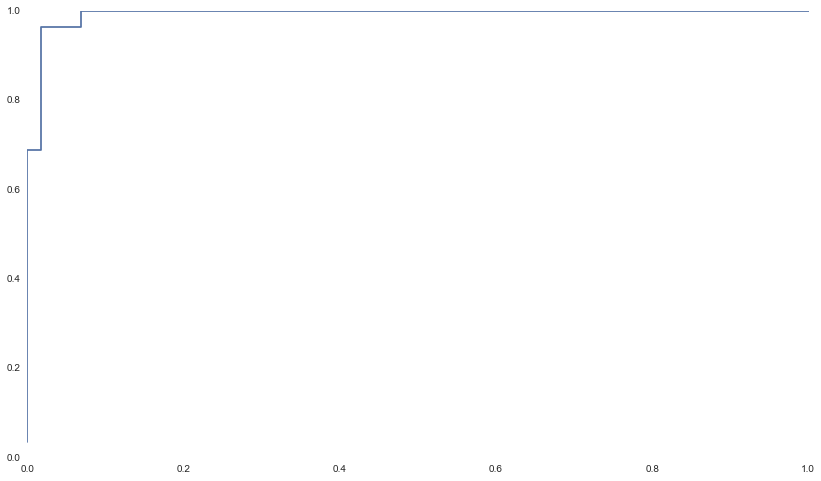

In [98]:
model                   = LogisticRegression()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.989001


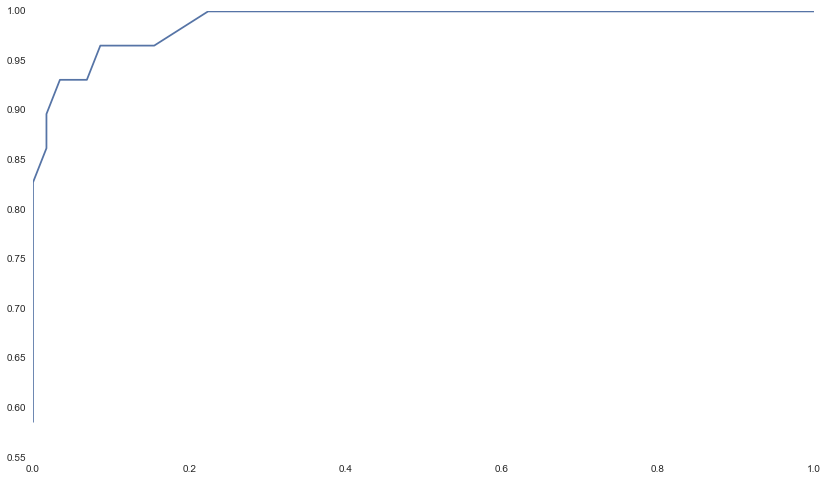

In [97]:
model = KNeighborsClassifier(n_neighbors=16)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.947384


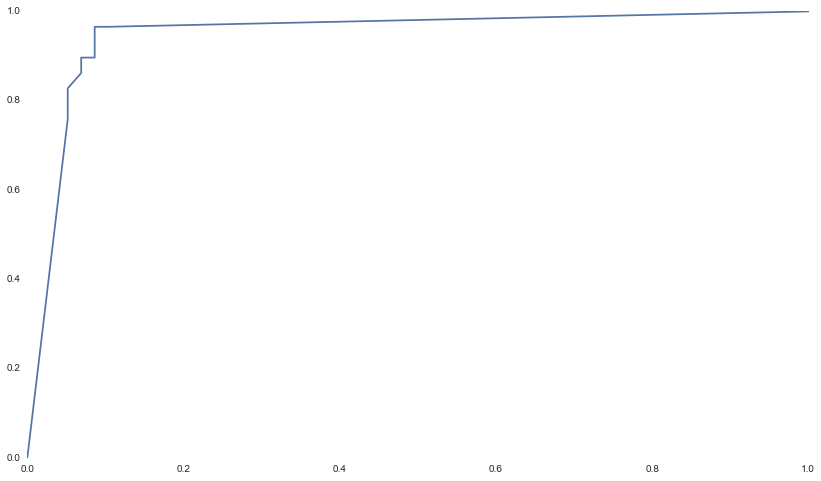

In [99]:
model                   = GaussianNB()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.995838


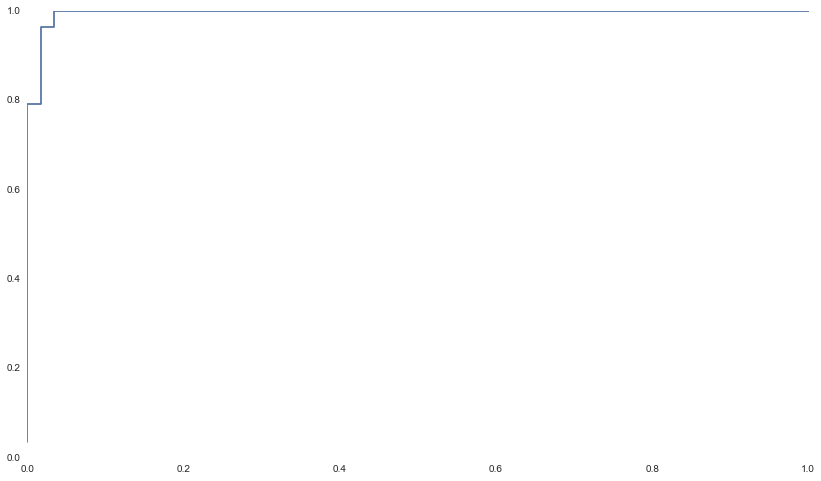

In [102]:
model                   = SVC(kernel="linear", probability=True)
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.896552


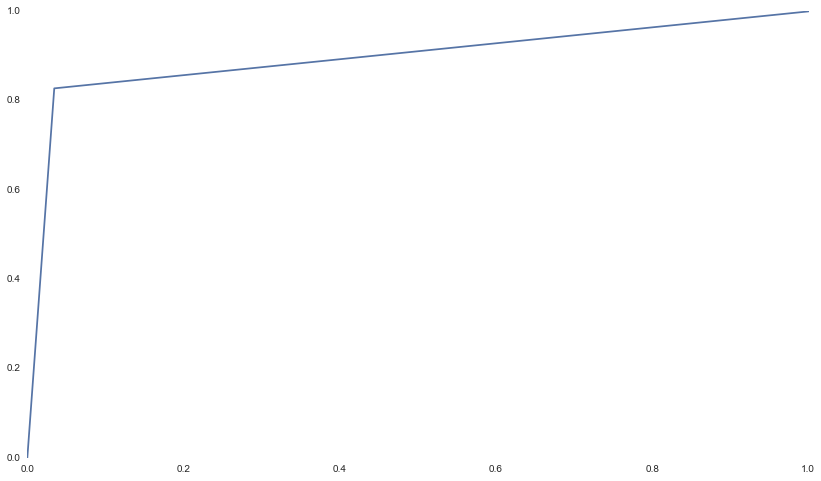

In [103]:
model                   = DecisionTreeClassifier()
probas_ = model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

AUC is: 0.992568


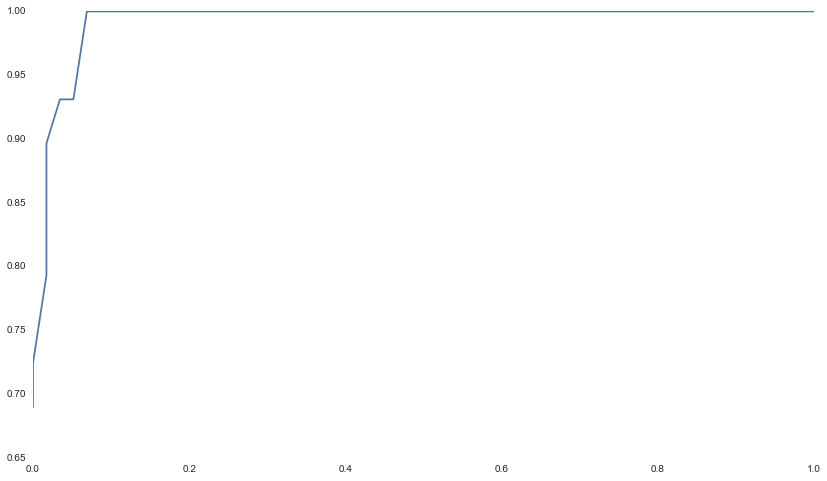

In [109]:
model                   = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred_proba  = model.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label="republican")
roc_auc = auc(fpr, tpr)
print "AUC is: %f" % roc_auc
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [153]:
# Challenge 3
from sklearn import metrics, preprocessing

df = challenge_one()
df = df.replace(['democrat', 'republican'], [0,1])
x_all                   = df.iloc[:,1:]
y_all                   = df.iloc[:,0]
model = LogisticRegression()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.952381
Precision: 0.949399
Recall: 0.952381
F1: 0.950059


In [154]:
model = GaussianNB()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.916667
Precision: 0.908613
Recall: 0.916667
F1: 0.911185


In [155]:
model = SVC()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1

Accuracy: 0.964286
Precision: 0.922271
Recall: 0.964286
F1: 0.942184


In [ ]:
model = LogisticRegression()
avg_acc = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_precision = np.mean(cross_val_score(model, x_all, y_all, scoring='precision'))
avg_recall = np.mean(cross_val_score(model, x_all, y_all, scoring='recall'))
avg_f1 = np.mean(cross_val_score(model, x_all, y_all, scoring='f1'))
print "Accuracy: %f" % avg_acc
print "Precision: %f" % avg_precision
print "Recall: %f" % avg_recall
print "F1: %f" % avg_f1